In [79]:
!pip3 install matplotlib
!pip3 install numpy

In [80]:
# basic imports

import numpy as np
import matplotlib.pyplot as plt
import csv
import sys

In [81]:
# extract data

def extract_data() :
    X = []
    Y = []
    
    data_file = open("housing.csv")
    data_reader = csv.reader(data_file)
    
    row_count = 0
    for row in data_reader :
        row_count += 1
        if(row_count != 1) :
            Y.append(float(row[1])) # price
            data_row = [float(1)]
            for i in range(2, len(row)) :
                if(row[i] == "yes" or row[i] == "no") :
                    if(row[i] == "yes") :
                        data_row.append(float(1))
                    else :
                        data_row.append(float(0))
                else :
                    data_row.append(float(row[i]))
            X.append(data_row)
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [82]:
# linear regression functions

# cost function linear regression normal
def cost_function_LR(X, Y, theta) :
    sample_count = float(X.shape[0])
    return (1 / (2 * sample_count)) * (np.dot(np.transpose(np.dot(X, theta) - Y) , np.dot(X, theta) - Y))

# gradient descent linear regression normal
def gradient_descent_LR(X, Y, theta, alpha, threshold) :
    costs = [cost_function_LR(X, Y, theta)]
    iterations = [1]
    sample_count = float(X.shape[0])
    iteration_count = 2
    
    while(True):
        theta = theta - (alpha / sample_count) * np.dot(np.transpose(X), np.dot(X, theta) - Y)
        
        current_cost = cost_function_LR(X, Y, theta)
        if(iteration_count % 1000000 == 0) :
            print(iteration_count, " => ", current_cost, " prev cost : ", costs[iteration_count - 2], " error diff :" , costs[iteration_count - 2] - current_cost)
        prev_cost = costs[iteration_count - 2]
        costs.append(current_cost)
        iterations.append(iteration_count)
        
        if(prev_cost - current_cost <= threshold) :
            break
            
        iteration_count = iteration_count + 1
    
    display_graph(costs, iterations)    # display graph 
    return theta

# initialize theta
def init_theta_LR(X) :
    return np.zeros(X.shape[1])

# display cost function v/s iterations
def display_graph(costs, iterations) :
    print("Number of iterations: ", iterations[-1])
    print("Final cost : ", costs[-1])
    plt.plot(iterations, costs)
    
# normal equation 
def normal_equation(X, Y) :
    return np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

In [83]:
# initialize global variables

X, Y = extract_data()
alpha = 0.00000006
threshold = 0.0001
theta = init_theta_LR(X)

In [84]:
# get params for LR

# LR_theta = gradient_descent_LR(X, Y, theta, alpha, threshold)

1000000  =>  294930216.0966527  prev cost :  294930255.6331527  error diff : 39.53650003671646
2000000  =>  260887130.10807732  prev cost :  260887159.21707064  error diff : 29.10899332165718
3000000  =>  235758747.50131917  prev cost :  235758769.0533421  error diff : 21.55202293395996
4000000  =>  217093898.38726872  prev cost :  217093914.45716804  error diff : 16.069899320602417
5000000  =>  203120700.8509505  prev cost :  203120712.9387357  error diff : 12.087785184383392
6000000  =>  192558027.2840466  prev cost :  192558036.47442347  error diff : 9.190376877784729
7000000  =>  184479315.04158658  prev cost :  184479322.11919904  error diff : 7.077612459659576
8000000  =>  178214187.3970181  prev cost :  178214192.92969596  error diff : 5.532677859067917
9000000  =>  173277386.40075842  prev cost :  173277390.7996544  error diff : 4.398895978927612
10000000  =>  169317434.30720454  prev cost :  169317437.87023786  error diff : 3.563033312559128
11000000  =>  166079545.87272108  p

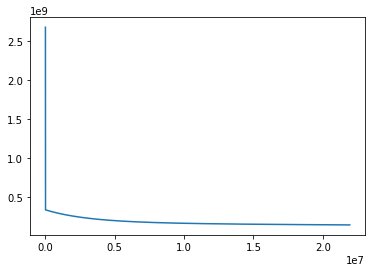

In [85]:
# initialize global variables
threshold = 1
LR_theta = gradient_descent_LR(X, Y, theta, alpha, threshold)

In [87]:
LR_theta

array([1.43972725e+03, 4.67550485e+00, 5.49545140e+03, 5.70824361e+03,
       6.63408322e+03, 2.18302619e+03, 1.81306569e+03, 2.59884975e+03,
       6.78432566e+02, 3.71615216e+03, 3.34088153e+03, 2.38764377e+03])

In [86]:
# for normal equation LR
normal_equation_LR_theta = normal_equation(X, Y)
print("Final cost : ", cost_function_LR(X, Y, normal_equation_LR_theta))
print("Final theta values : ", normal_equation_LR_theta)

Final cost :  116323325.68174723
Final theta values :  [-4.03835043e+03  3.54630297e+00  1.83200347e+03  1.43355585e+04
  6.55694571e+03  6.68777889e+03  4.51128383e+03  5.45238554e+03
  1.28314063e+04  1.26328904e+04  4.24482900e+03  9.36951324e+03]
